In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
dt=pd.read_excel("census_india.xlsx")
dt

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
0,0,0,0,INDIA,INDIA,Total,597608,43324,7933,249501663,1210854977,623270258,587584719,3.287469e+06,382.0
1,0,0,0,INDIA,INDIA,Rural,597608,43324,0,168612897,833748852,427781058,405967794,3.101474e+06,279.0
2,0,0,0,INDIA,INDIA,Urban,0,0,7933,80888766,377106125,195489200,181616925,1.022520e+05,3685.0
3,1,0,0,STATE,JAMMU & KASHMIR,Total,6337,216,122,2119718,12541302,6640662,5900640,2.222360e+05,124.0
4,1,0,0,STATE,JAMMU & KASHMIR,Rural,6337,216,0,1553433,9108060,4774477,4333583,2.209901e+05,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19987,35,640,5923,SUB-DISTRICT,Port Blair,Rural,30,3,0,8083,32969,18322,14647,5.200115e+02,63.0
19988,35,640,5923,SUB-DISTRICT,Port Blair,Urban,0,0,3,33390,132785,71089,61696,2.840000e+01,4676.0
19989,35,640,5924,SUB-DISTRICT,Little Andaman,Total,16,3,0,5093,18823,9964,8859,7.801527e+02,24.0
19990,35,640,5924,SUB-DISTRICT,Little Andaman,Rural,16,3,0,5093,18823,9964,8859,7.801527e+02,24.0


In [3]:
# Population Analysis
# 1 What is the total population of India according to the dataset?
dt[dt["Population Persons"]==dt["Population Persons"].max()]

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
0,0,0,0,INDIA,INDIA,Total,597608,43324,7933,249501663,1210854977,623270258,587584719,3287469.0,382.0


In [4]:
states_of_india = [
    # Original Case
    "INDIA","Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", 
    "Chhattisgarh", "Goa", "Gujarat", "Haryana", 
    "Himachal Pradesh", "Jharkhand", "Karnataka", "Kerala", 
    "Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya", 
    "Mizoram", "Nagaland", "Odisha", "Punjab", 
    "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", 
    "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal",
    
    # Uppercase
    "ANDHRA PRADESH", "ARUNACHAL PRADESH", "ASSAM", "BIHAR", 
    "CHHATTISGARH", "GOA", "GUJARAT", "HARYANA", 
    "HIMACHAL PRADESH", "JHARKHAND", "KARNATAKA", "KERALA", 
    "MADHYA PRADESH", "MAHARASHTRA", "MANIPUR", "MEGHALAYA", 
    "MIZORAM", "NAGALAND", "ODISHA", "PUNJAB", 
    "RAJASTHAN", "SIKKIM", "TAMIL NADU", "TELANGANA", 
    "TRIPURA", "UTTAR PRADESH", "UTTARAKHAND", "WEST BENGAL",
    
    # Lowercase
    "andhra pradesh", "arunachal pradesh", "assam", "bihar", 
    "chhattisgarh", "goa", "gujarat", "haryana", 
    "himachal pradesh", "jharkhand", "karnataka", "kerala", 
    "madhya pradesh", "maharashtra", "manipur", "meghalaya", 
    "mizoram", "nagaland", "odisha", "punjab", 
    "rajasthan", "sikkim", "tamil nadu", "telangana", 
    "tripura", "uttar pradesh", "uttarakhand", "west bengal"
]


In [5]:
print(states_of_india)

['INDIA', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jharkhand', 'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'punjab', 

In [6]:


# Filter rows that match the state names
filtered_df = dt[dt['Name'].isin(states_of_india)]

filtered_df


,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
318,2,0,0,STATE,HIMACHAL PRADESH,Total,17882,2808,59,1483280,6864602,3481873,3382729,55673.00,123.0
319,2,0,0,STATE,HIMACHAL PRADESH,Rural,17882,2808,0,1312510,6176050,3110345,3065705,55402.18,111.0
320,2,0,0,STATE,HIMACHAL PRADESH,Urban,0,0,59,170770,688552,371528,317024,270.82,2542.0
708,3,0,0,STATE,PUNJAB,Total,12168,413,217,5513071,27743338,14639465,13103873,50362.00,551.0
709,3,0,0,STATE,PUNJAB,Rural,12168,413,0,3358113,17344192,9093476,8250716,47847.40,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18934,32,0,0,STATE,KERALA,Rural,1017,1,0,4149641,17471135,8408054,9063081,31253.20,559.0
18935,32,0,0,STATE,KERALA,Urban,0,0,520,3704113,15934926,7619358,8315568,7598.80,2097.0
19167,33,0,0,STATE,TAMIL NADU,Total,15049,930,1097,18524982,72147030,36137975,36009055,130060.00,555.0
19168,33,0,0,STATE,TAMIL NADU,Rural,15049,930,0,9528495,37229590,18679065,18550525,116424.47,320.0


In [7]:
# 2 Which state has the highest population?
filtered_df[filtered_df["Population Persons"]==filtered_df["Population Persons"].max()]


,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
2520,9,0,0,STATE,UTTAR PRADESH,Total,97814,8960,915,33448035,199812341,104480510,95331831,240928.0,829.0


In [8]:
# 3 Which state has the lowest population?
filtered_df[filtered_df["Population Persons"]==filtered_df["Population Persons"].min()]

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
5393,11,0,0,STATE,SIKKIM,Urban,0,0,9,35718,153578,80273,73305,38.25,4015.0


In [9]:
filtered_df.sort_values(by="Population Persons")

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
5393,11,0,0,STATE,SIKKIM,Urban,0,0,9,35718,153578,80273,73305,38.250000,4015.000000
4876,10,229,1386,SUB-DISTRICT,Bihar,Rural,72,3,0,33096,197221,102453,94768,147.735787,1335.000000
4877,10,229,1386,SUB-DISTRICT,Bihar,Urban,0,0,1,48641,297268,155216,142052,23.500000,12650.000000
5435,12,0,0,STATE,ARUNACHAL PRADESH,Urban,0,0,27,70367,317369,167901,149468,NaN,NaN
5392,11,0,0,STATE,SIKKIM,Rural,425,26,0,93288,456999,242797,214202,7057.750000,65.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,10,0,0,STATE,BIHAR,Rural,39073,5801,0,16862940,92341436,48073850,44267586,91838.280000,1005.000000
3672,10,0,0,STATE,BIHAR,Total,39073,5801,199,18913565,104099452,54278157,49821295,94163.000000,1106.000000
13587,27,0,0,STATE,MAHARASHTRA,Total,40959,2706,534,24421519,112374333,58243056,54131277,307713.000000,365.192023
2521,9,0,0,STATE,UTTAR PRADESH,Rural,97814,8960,0,25685942,155317278,80992995,74324283,233365.710000,666.000000


In [10]:
a=filtered_df[(filtered_df["India/ State/ Union Territory/ District/ Sub-district"]=="STATE") & (filtered_df["Total/\nRural/\nUrban"]=="Total")]

In [11]:
dt.columns

Index(['State  Code', 'District Code', 'Sub District Code',
       'India/ State/ Union Territory/ District/ Sub-district', 'Name',
       'Total/\nRural/\nUrban', 'Number of villages Inhabited',
       'Number of villages Uninhabited', 'Number of towns',
       'Number of households', 'Population Persons', 'Population Males',
       'Population Females', 'Area\n (In sq. km)', 'Population per sq. km.'],
      dtype='object')

In [12]:
a.sort_values(by="Population Persons")

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
5391,11,0,0,STATE,SIKKIM,Total,425,26,9,129006,610577,323070,287507,7096.0,86.000000
6570,15,0,0,STATE,MIZORAM,Total,704,126,23,222853,1097206,555339,541867,21081.0,52.047151
5433,12,0,0,STATE,ARUNACHAL PRADESH,Total,5258,331,27,270577,1383727,713912,669815,83743.0,17.000000
18855,30,0,0,STATE,GOA,Total,320,14,70,343611,1458545,739140,719405,3702.0,394.000000
6048,13,0,0,STATE,NAGALAND,Total,1400,28,26,396002,1978502,1024649,953853,16579.0,119.337837
6426,14,0,0,STATE,MANIPUR,Total,2515,67,51,557859,2855794,1438586,1417208,22327.0,127.907645
6831,17,0,0,STATE,MEGHALAYA,Total,6459,380,22,548059,2966889,1491832,1475057,22429.0,132.279148
6684,16,0,0,STATE,TRIPURA,Total,863,12,42,855556,3673917,1874376,1799541,10486.0,350.364009
318,2,0,0,STATE,HIMACHAL PRADESH,Total,17882,2808,59,1483280,6864602,3481873,3382729,55673.0,123.000000
1011,5,0,0,STATE,UTTARAKHAND,Total,15745,1048,115,2056975,10086292,5137773,4948519,53483.0,189.000000


In [13]:
# 4 What is the total rural population in India?
dt

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
0,0,0,0,INDIA,INDIA,Total,597608,43324,7933,249501663,1210854977,623270258,587584719,3.287469e+06,382.0
1,0,0,0,INDIA,INDIA,Rural,597608,43324,0,168612897,833748852,427781058,405967794,3.101474e+06,279.0
2,0,0,0,INDIA,INDIA,Urban,0,0,7933,80888766,377106125,195489200,181616925,1.022520e+05,3685.0
3,1,0,0,STATE,JAMMU & KASHMIR,Total,6337,216,122,2119718,12541302,6640662,5900640,2.222360e+05,124.0
4,1,0,0,STATE,JAMMU & KASHMIR,Rural,6337,216,0,1553433,9108060,4774477,4333583,2.209901e+05,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19987,35,640,5923,SUB-DISTRICT,Port Blair,Rural,30,3,0,8083,32969,18322,14647,5.200115e+02,63.0
19988,35,640,5923,SUB-DISTRICT,Port Blair,Urban,0,0,3,33390,132785,71089,61696,2.840000e+01,4676.0
19989,35,640,5924,SUB-DISTRICT,Little Andaman,Total,16,3,0,5093,18823,9964,8859,7.801527e+02,24.0
19990,35,640,5924,SUB-DISTRICT,Little Andaman,Rural,16,3,0,5093,18823,9964,8859,7.801527e+02,24.0


In [14]:
# 5 What is the total urban population in India?
dt

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
0,0,0,0,INDIA,INDIA,Total,597608,43324,7933,249501663,1210854977,623270258,587584719,3.287469e+06,382.0
1,0,0,0,INDIA,INDIA,Rural,597608,43324,0,168612897,833748852,427781058,405967794,3.101474e+06,279.0
2,0,0,0,INDIA,INDIA,Urban,0,0,7933,80888766,377106125,195489200,181616925,1.022520e+05,3685.0
3,1,0,0,STATE,JAMMU & KASHMIR,Total,6337,216,122,2119718,12541302,6640662,5900640,2.222360e+05,124.0
4,1,0,0,STATE,JAMMU & KASHMIR,Rural,6337,216,0,1553433,9108060,4774477,4333583,2.209901e+05,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19987,35,640,5923,SUB-DISTRICT,Port Blair,Rural,30,3,0,8083,32969,18322,14647,5.200115e+02,63.0
19988,35,640,5923,SUB-DISTRICT,Port Blair,Urban,0,0,3,33390,132785,71089,61696,2.840000e+01,4676.0
19989,35,640,5924,SUB-DISTRICT,Little Andaman,Total,16,3,0,5093,18823,9964,8859,7.801527e+02,24.0
19990,35,640,5924,SUB-DISTRICT,Little Andaman,Rural,16,3,0,5093,18823,9964,8859,7.801527e+02,24.0


In [15]:
# 6 Which state has the highest rural population?
rural=filtered_df[filtered_df["Total/\nRural/\nUrban"].str.contains("Rural")]
rural.sort_values(by="Population Persons",ascending=False)

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
2521,9,0,0,STATE,UTTAR PRADESH,Rural,97814,8960,0,25685942,155317278,80992995,74324283,233365.710000,666.000000
3673,10,0,0,STATE,BIHAR,Rural,39073,5801,0,16862940,92341436,48073850,44267586,91838.280000,1005.000000
7609,19,0,0,STATE,WEST BENGAL,Rural,37469,2734,0,13813165,62183113,31844945,30338168,83626.430000,743.582059
13588,27,0,0,STATE,MAHARASHTRA,Rural,40959,2706,0,13214738,61556074,31539034,30017040,298619.450000,206.135515
14767,28,0,0,STATE,ANDHRA PRADESH,Rural,26286,1514,0,14234387,56361702,28243241,28118461,267190.500000,210.942013
11629,23,0,0,STATE,MADHYA PRADESH,Rural,51929,2974,0,11080278,52557404,27149388,25408016,300505.590000,174.896593
1687,8,0,0,STATE,RAJASTHAN,Rural,43264,1408,0,9494903,51500352,26641747,24858605,335606.040000,153.000000
18223,29,0,0,STATE,KARNATAKA,Rural,27397,1943,0,7946657,37469335,18929354,18539981,185776.570000,202.000000
19168,33,0,0,STATE,TAMIL NADU,Rural,15049,930,0,9528495,37229590,18679065,18550525,116424.470000,320.000000
9601,21,0,0,STATE,ODISHA,Rural,47675,3636,0,8089987,34970562,17586203,17384359,152355.340000,229.532893


In [16]:
# 7 Which state has the highest urban population?
urban=filtered_df[filtered_df["Total/\nRural/\nUrban"].str.contains("Urban")]
urban.sort_values(by="Population Persons",ascending=False)

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
13589,27,0,0,STATE,MAHARASHTRA,Urban,0,0,534,11206781,50818259,26704022,24114237,9093.55,5588.385064
2522,9,0,0,STATE,UTTAR PRADESH,Urban,0,0,915,7762093,44495063,23487515,21007548,7562.29,5884.000000
19169,33,0,0,STATE,TAMIL NADU,Urban,0,0,1097,8996487,34917440,17458910,17458530,13635.53,2561.000000
7610,19,0,0,STATE,WEST BENGAL,Urban,0,0,909,6567150,29093002,14964082,14128920,5125.57,5676.052029
14768,28,0,0,STATE,ANDHRA PRADESH,Urban,0,0,353,6788201,28219075,14198905,14020170,7854.50,3592.727099
12809,24,0,0,STATE,GUJARAT,Urban,0,0,348,5474870,25745083,13692101,12052982,7405.40,3476.528344
18224,29,0,0,STATE,KARNATAKA,Urban,0,0,347,5410370,23625962,12037303,11588659,6014.43,3928.000000
11630,23,0,0,STATE,MADHYA PRADESH,Urban,0,0,476,4012978,20069405,10462918,9606487,7746.41,2590.800771
1688,8,0,0,STATE,RAJASTHAN,Urban,0,0,297,3216243,17048085,8909250,8138835,6632.96,2570.000000
18935,32,0,0,STATE,KERALA,Urban,0,0,520,3704113,15934926,7619358,8315568,7598.80,2097.000000


In [17]:
# 8 Which states contribute the most to the total male population?
state_df=dt[(dt["India/ State/ Union Territory/ District/ Sub-district"]=="STATE")&(dt["Total/\nRural/\nUrban"]=="Total")]
state_df.sort_values(by="Population Males",ascending=False)

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
2520,9,0,0,STATE,UTTAR PRADESH,Total,97814,8960,915,33448035,199812341,104480510,95331831,240928.0,829.000000
13587,27,0,0,STATE,MAHARASHTRA,Total,40959,2706,534,24421519,112374333,58243056,54131277,307713.0,365.192023
3672,10,0,0,STATE,BIHAR,Total,39073,5801,199,18913565,104099452,54278157,49821295,94163.0,1106.000000
7608,19,0,0,STATE,WEST BENGAL,Total,37469,2734,909,20380315,91276115,46809027,44467088,88752.0,1028.440091
14766,28,0,0,STATE,ANDHRA PRADESH,Total,26286,1514,353,21022588,84580777,42442146,42138631,275045.0,307.516141
11628,23,0,0,STATE,MADHYA PRADESH,Total,51929,2974,476,15093256,72626809,37612306,35014503,308252.0,235.608557
19167,33,0,0,STATE,TAMIL NADU,Total,15049,930,1097,18524982,72147030,36137975,36009055,130060.0,555.000000
1686,8,0,0,STATE,RAJASTHAN,Total,43264,1408,297,12711146,68548437,35550997,32997440,342239.0,200.000000
12807,24,0,0,STATE,GUJARAT,Total,17843,382,348,12248428,60439692,31491260,28948432,196244.0,307.982369
18222,29,0,0,STATE,KARNATAKA,Total,27397,1943,347,13357027,61095297,30966657,30128640,191791.0,319.000000


In [18]:
# 9 Which states contribute the most to the total female population?
state_df.sort_values(by="Population Females",ascending=False)

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
2520,9,0,0,STATE,UTTAR PRADESH,Total,97814,8960,915,33448035,199812341,104480510,95331831,240928.0,829.000000
13587,27,0,0,STATE,MAHARASHTRA,Total,40959,2706,534,24421519,112374333,58243056,54131277,307713.0,365.192023
3672,10,0,0,STATE,BIHAR,Total,39073,5801,199,18913565,104099452,54278157,49821295,94163.0,1106.000000
7608,19,0,0,STATE,WEST BENGAL,Total,37469,2734,909,20380315,91276115,46809027,44467088,88752.0,1028.440091
14766,28,0,0,STATE,ANDHRA PRADESH,Total,26286,1514,353,21022588,84580777,42442146,42138631,275045.0,307.516141
19167,33,0,0,STATE,TAMIL NADU,Total,15049,930,1097,18524982,72147030,36137975,36009055,130060.0,555.000000
11628,23,0,0,STATE,MADHYA PRADESH,Total,51929,2974,476,15093256,72626809,37612306,35014503,308252.0,235.608557
1686,8,0,0,STATE,RAJASTHAN,Total,43264,1408,297,12711146,68548437,35550997,32997440,342239.0,200.000000
18222,29,0,0,STATE,KARNATAKA,Total,27397,1943,347,13357027,61095297,30966657,30128640,191791.0,319.000000
12807,24,0,0,STATE,GUJARAT,Total,17843,382,348,12248428,60439692,31491260,28948432,196244.0,307.982369


In [19]:
# Gender Analysis
# 10 What is the overall gender ratio (females per 1,000 males) in India?
state_df["female gender ratio per 1000 male"]=(state_df["Population Females"]/state_df["Population Males"])*1000
state_df.sort_values(by="female gender ratio per 1000 male",ascending=False)

C:\Users\Sumit\AppData\Local\Temp\ipykernel_5552\1763779050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df["female gender ratio per 1000 male"]=(state_df["Population Females"]/state_df["Population Males"])*1000


,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.,female gender ratio per 1000 male
18933,32,0,0,STATE,KERALA,Total,1017,1,520,7853754,33406061,16027412,17378649,38852.0,860.000000,1084.307872
19914,34,0,0,STATE,PUDUCHERRY,Total,90,0,10,302450,1247953,612511,635442,490.0,2547.000000,1037.437695
19167,33,0,0,STATE,TAMIL NADU,Total,15049,930,1097,18524982,72147030,36137975,36009055,130060.0,555.000000,996.432562
14766,28,0,0,STATE,ANDHRA PRADESH,Total,26286,1514,353,21022588,84580777,42442146,42138631,275045.0,307.516141,992.848736
11124,22,0,0,STATE,CHHATTISGARH,Total,19567,559,182,5650724,25545198,12832895,12712303,135192.0,188.954953,990.602900
6831,17,0,0,STATE,MEGHALAYA,Total,6459,380,22,548059,2966889,1491832,1475057,22429.0,132.279148,988.755436
6426,14,0,0,STATE,MANIPUR,Total,2515,67,51,557859,2855794,1438586,1417208,22327.0,127.907645,985.139575
9600,21,0,0,STATE,ODISHA,Total,47675,3636,223,9637820,41974218,21212136,20762082,155707.0,269.571811,978.783183
6570,15,0,0,STATE,MIZORAM,Total,704,126,23,222853,1097206,555339,541867,21081.0,52.047151,975.740944
18855,30,0,0,STATE,GOA,Total,320,14,70,343611,1458545,739140,719405,3702.0,394.000000,973.300051


In [20]:
# 11 Which state has the highest gender ratio?
state_df[state_df["female gender ratio per 1000 male"]==state_df["female gender ratio per 1000 male"].max()]

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.,female gender ratio per 1000 male
18933,32,0,0,STATE,KERALA,Total,1017,1,520,7853754,33406061,16027412,17378649,38852.0,860.0,1084.307872


In [21]:
# 12 Which state has the lowest gender ratio?
state_df[state_df["female gender ratio per 1000 male"]==state_df["female gender ratio per 1000 male"].min()]

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.,female gender ratio per 1000 male
13563,25,0,0,STATE,DAMAN & DIU,Total,19,0,8,60956,243247,150301,92946,111.0,2191.414414,618.399079


In [22]:
# Density and Area Analysis
# 14 Which state has the highest population density?
state_df[state_df["Population per sq. km."]==state_df["Population per sq. km."].max()]

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.,female gender ratio per 1000 male
1575,7,0,0,STATE,NCT OF DELHI,Total,103,9,113,3435999,16787941,8987326,7800615,1483.0,11320.0,867.957277


In [23]:
# 15 Which state has the lowest population density?
state_df[state_df["Population per sq. km."]==state_df["Population per sq. km."].min()]

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.,female gender ratio per 1000 male
5433,12,0,0,STATE,ARUNACHAL PRADESH,Total,5258,331,27,270577,1383727,713912,669815,83743.0,17.0,938.231883


In [24]:
# Village and Town Analysis
# 16 How many inhabited villages are there in total across India?
state_df[["Number of villages Inhabited"]].sum()

Number of villages Inhabited    597608
dtype: int64

In [25]:
# 17 How many uninhabited villages are there in total across India?
state_df[["Number of villages Uninhabited"]].sum()

Number of villages Uninhabited    43324
dtype: int64

In [26]:
# 18 Which state has the highest number of inhabited villages?
state_df[state_df["Number of villages Inhabited"]==state_df["Number of villages Inhabited"].max()]

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.,female gender ratio per 1000 male
2520,9,0,0,STATE,UTTAR PRADESH,Total,97814,8960,915,33448035,199812341,104480510,95331831,240928.0,829.0,912.436501


In [27]:
# 19 Which state has the highest number of uninhabited villages?
state_df[state_df["Number of villages Uninhabited"]==state_df["Number of villages Uninhabited"].max()]

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.,female gender ratio per 1000 male
2520,9,0,0,STATE,UTTAR PRADESH,Total,97814,8960,915,33448035,199812341,104480510,95331831,240928.0,829.0,912.436501


In [28]:
# 20 What is the total number of towns in India?
state_df[["Number of towns"]].sum()

Number of towns    7933
dtype: int64

In [29]:
# 21 Which state has the most towns?
state_df[state_df["Number of towns"]==state_df["Number of towns"].max()]

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.,female gender ratio per 1000 male
19167,33,0,0,STATE,TAMIL NADU,Total,15049,930,1097,18524982,72147030,36137975,36009055,130060.0,555.0,996.432562


In [30]:
# 22 Which state has the least number of towns?
state_df[state_df["Number of towns"]==state_df["Number of towns"].min()]

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.,female gender ratio per 1000 male
19953,35,0,0,STATE,ANDAMAN & NICOBAR ISLANDS,Total,396,159,5,94551,380581,202871,177710,8249.0,46.0,875.975374


In [31]:
state_df1=dt[(dt["India/ State/ Union Territory/ District/ Sub-district"]=="STATE")&(dt["Total/\nRural/\nUrban"]!="Total")]
state_df1

,State Code,District Code,Sub District Code,India/ State/ Union Territory/ District/ Sub-district,Name,Total/\nRural/\nUrban,Number of villages Inhabited,Number of villages Uninhabited,Number of towns,Number of households,Population Persons,Population Males,Population Females,Area\n (In sq. km),Population per sq. km.
4,1,0,0,STATE,JAMMU & KASHMIR,Rural,6337,216,0,1553433,9108060,4774477,4333583,220990.10,91.0
5,1,0,0,STATE,JAMMU & KASHMIR,Urban,0,0,122,566285,3433242,1866185,1567057,1245.90,2755.0
319,2,0,0,STATE,HIMACHAL PRADESH,Rural,17882,2808,0,1312510,6176050,3110345,3065705,55402.18,111.0
320,2,0,0,STATE,HIMACHAL PRADESH,Urban,0,0,59,170770,688552,371528,317024,270.82,2542.0
709,3,0,0,STATE,PUNJAB,Rural,12168,413,0,3358113,17344192,9093476,8250716,47847.40,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19169,33,0,0,STATE,TAMIL NADU,Urban,0,0,1097,8996487,34917440,17458910,17458530,13635.53,2561.0
19915,34,0,0,STATE,PUDUCHERRY,Rural,90,0,0,95018,395200,194907,200293,335.44,1178.0
19916,34,0,0,STATE,PUDUCHERRY,Urban,0,0,10,207432,852753,417604,435149,154.56,5517.0
19954,35,0,0,STATE,ANDAMAN & NICOBAR ISLANDS,Rural,396,159,0,58530,237093,126287,110806,8211.08,29.0


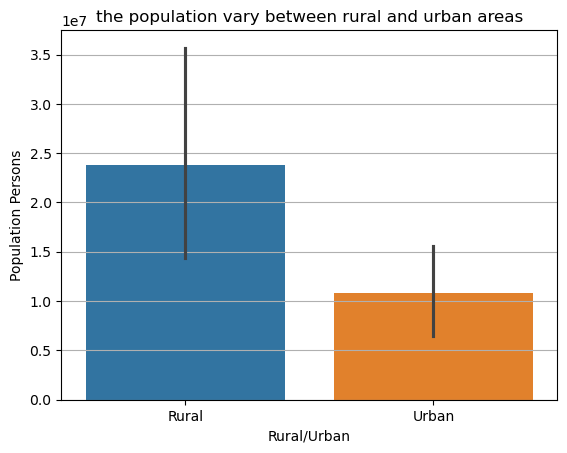

In [32]:
# 23. How does the population vary between rural and urban areas in a single visual (e.g., stacked bar chart)?
sns.barplot(x=state_df1["Total/\nRural/\nUrban"],y=state_df1["Population Persons"],hue=state_df1["Total/\nRural/\nUrban"])
plt.grid(axis="y",alpha=1)
plt.xlabel(xlabel="Rural/Urban")
plt.ylabel(ylabel="Population Persons")
plt.title(label="the population vary between rural and urban areas")
plt.show()

In [78]:
filtered_df.to_csv("filtered_df.csv")